# Introducción al machine learning con python: sklearn
---

<div class="panel panel-success">
    <div class='panel-heading'>
    <h4>Empecemos</h4>
    </div>
    <div class='panel-body'>
    <ol type="A">
    <li>sklearn</li>
    <li>Example: LinearRegresion</li>
</ol>
    
</div>
</div>


# scikit learn

![img/sklearn.png](img/sklearn.png)

SKlearn es la librería de facto para construir modelos de ML en python. Poseé una arquitectura intuitiva y generalizada a todos los tipos de modelos. Además, incluye una serie de herramientas que nos ayudarán no solo a entrenar y ejecutar modelos, si no también a seleccionarlos, trabajar las variables, y evaluar la eficiencia de nuestros sistemas de ML.

Según su descripción en la página web:

* Simple and efficient tools for data mining and data analysis
* Accessible to everybody, and reusable in various contexts
* Built on NumPy, SciPy, and matplotlib


# Ejemplo básico

Antes de empezar a usarla, deberemos importar la libreria. Por convención, se utilizará la fuente entera y el modulo a cargar. Por ejemplo, si queremos cargar un arbol de decisión, deberíamos ejecutar:

```python
from sklearn.tree import DecisionTreeClassifier
```

El número de modelos de ML, así como las distintas funcionalidades auxiliares son muy extensas. Por suerte, la documentación de sklearn es muy completa y explicativa, por lo que una busqueda rápida en google sobre la libreria que buscamos debería bastar para encontrarlo.

Sklearn visual map

[https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

### Ejercicio 0: Carga las librerías básicas para crear un entorno de analisis de datos

In [1]:
%matplotlib inline

import pandas as pd  ###
import numpy as np  ###
import seaborn as sns  ###
import matplotlib.pyplot as plt  ###

In [2]:
sns.set_style('darkgrid')
sns.set_context('notebook')

En este ejemplo, empezaremos por ver como crear un clasificador binario

### Ejercicio 1: Carga los datos en un dataframe.


In [3]:
pima_diabetes_data_file_path = 'data/pima-indians-diabetes.data'

df = pd.read_csv(pima_diabetes_data_file_path, header=None)

In [4]:
columns = ['times_pregnant', 'glucosa', 'presion', 'skinfold', 'insulina', 'bmi', 'pedigree', 'edad', 'diabetes']
df.columns = columns  ###

In [5]:
df.head()

,times_pregnant,glucosa,presion,skinfold,insulina,bmi,pedigree,edad,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Ejercicio 2: Genera los descriptivos básicos e intenta contestar a:

1. Es un problema desbalanceado?
1. Existen valores nulos?
1. Existen outliers?

In [6]:
### Haz un describe sobre el dataframe
df.describe()

,times_pregnant,glucosa,presion,skinfold,insulina,bmi,pedigree,edad,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


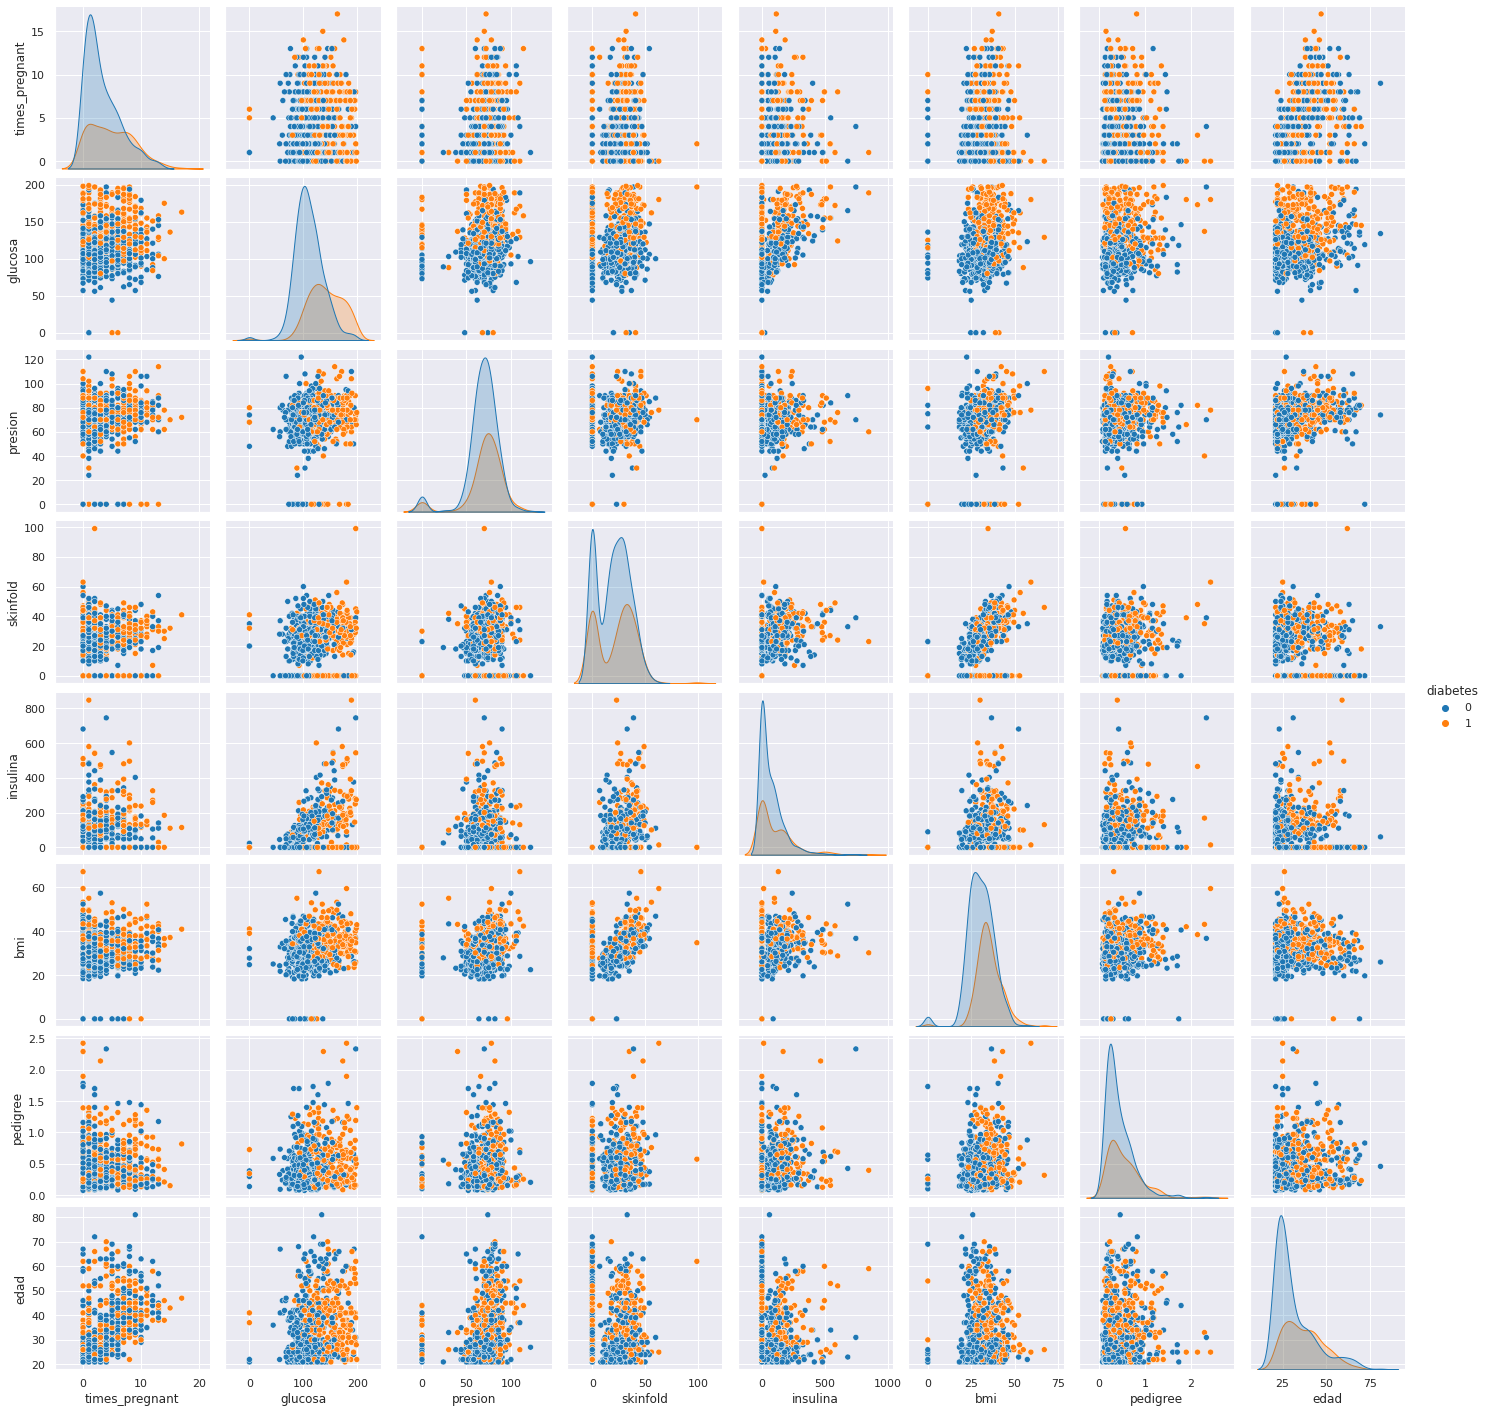

In [7]:
# Calcula i dibuixa els diagrames creuats
# Per veurer-la millor, obrir la imatge en una altra pipella

sns.pairplot(df, hue='diabetes')

In [8]:
## Miram si hi ha registres amb valors NaN

print(df.shape == df.dropna().shape)

True


### Resposta exercici 2:

1. Es un problema desbalanceado?

    La mitja del camp binari *diabetes* és del 35% aproximadament, 
    per tant el problema té un cert desbalancejament, encara que 
    no és exagerat.

2. Existen valores nulos?

    Sí. 
    Hi ha valors nuls a indicadors que no en poden tenir, 
    com per exemple la glucosa, la pressió, el greix corporal 
    o l'índex de massa corporal.


3. Existen outliers?

    Sí.
    Hi ha valors d'insulina molt separats del núvol principal, 
    amb valors més grans de 500, 
    que pens que no són medicament possibles.

### Ejercicio 3

Divide los datos en dos partes, df_train y df_test con el 80% y el 20% de los datos repartidos de forma aleatoria.

### Por qué hacemos esto?

### Resposta: 

Volem comprovar si el model funciona bé, per tant dividim de forma aleatòria el conjunt de dades en dos.
Un servirà per entrenar el model (80-85%) 
i l'altre (20-15%) per comprovar quin grau de fiabilitat en la predicció hem obtingut. 

In [9]:
### Mezcla el dataframe y utiliza una random_seed = 42

df = df.sample(frac=1, random_state=42)  ###


### Cuanto es el 80% de los datos?
train_size = int(0.80 * df.shape[0])


### Crea una df_train y el df_test a partir del resultado anterior y el metodo .loc[]
df_train = df.loc[:train_size]
df_test = df.loc[train_size:]

### Ejercicio 3: Carga la libreria de sklearn que permite entrenar una regresión lineal.

Instancia el modelo bajo el nombre `reg_lr`

In [10]:
from sklearn.linear_model import LinearRegression  ###

reg_lr = LinearRegression()  ###

### Ejercicio 4: Entrena el modelo y evalualo con el dataframe de test

In [11]:
## dropea la variable 'diabetes' en el eje 1 del dataframe y guardalo en X_train
X_train = df_train.drop('diabetes', axis = 1)  ###

y_train = df_train['diabetes']  ###

##### Entrena el modelo utilizando sólo una variable

In [12]:
predictor_var = 'edad' # amb 'bmi' dona un score de 0.3186
type(pd.DataFrame(X_train[predictor_var]))

pandas.core.frame.DataFrame

In [13]:
reg_lr.fit(X_train[[predictor_var]], y_train.values)

LinearRegression()

In [14]:
reg_lr.coef_

array([0.00956832])

##### Testea el rendimiento del modelo en el subset de testeo

In [15]:
X_test = df_test.drop('diabetes', axis=1)
y_test = df_test['diabetes']

reg_lr.score(X_test[[predictor_var]], y_test)

0.2196408193964685

## Genera predicciones para un rango posible de la variable independiente

In [16]:
### min - 2*std (alerta!: l'edat ha de ser positiva)
### max + 2*std

x_min = np.maximum(0, int(df[predictor_var].min() - 2 * df[predictor_var].std()))
x_max = int(df[predictor_var].max() + 2 * df[predictor_var].std())

## Composición del rango (tenemos que darle las dimensiones correctas al vector, n_filas x 1 columna)
X_for_plot = np.linspace(x_min, x_max, num = 50).reshape(-1, 1)

### Obtener predicciones
y_hat = reg_lr.predict(X_for_plot)

y_hat

array([0.03099433, 0.0513026 , 0.07161086, 0.09191913, 0.11222739,
       0.13253565, 0.15284392, 0.17315218, 0.19346045, 0.21376871,
       0.23407698, 0.25438524, 0.27469351, 0.29500177, 0.31531004,
       0.3356183 , 0.35592657, 0.37623483, 0.3965431 , 0.41685136,
       0.43715963, 0.45746789, 0.47777616, 0.49808442, 0.51839269,
       0.53870095, 0.55900922, 0.57931748, 0.59962575, 0.61993401,
       0.64024228, 0.66055054, 0.68085881, 0.70116707, 0.72147534,
       0.7417836 , 0.76209187, 0.78240013, 0.8027084 , 0.82301666,
       0.84332493, 0.86363319, 0.88394146, 0.90424972, 0.92455799,
       0.94486625, 0.96517452, 0.98548278, 1.00579105, 1.02609931])

> Nota
>
> Los clasificadores pueden tener el metodo `model.predict_proba()` que nos devolveran la probabilidad de pertenecer a cada una de las clases.

In [17]:
## 'LinearRegression' object has no attribute 'predict_proba'

#y_hat = reg_lr.predict_proba(X_for_plot)[:, 1]

## Plotea los resultados

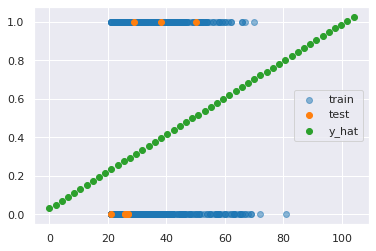

In [18]:
ps1 = plt.scatter(X_train[predictor_var], y_train, alpha=0.5)
ps2 = plt.scatter(X_test[predictor_var], y_test)
ps3 = plt.scatter(X_for_plot, y_hat)

plt.legend([ps1, ps2, ps3], 
           ["train", "test", "y_hat"], loc='center right')

plt.show()

## Por qué no podemos usar una regresión lineal como clasificador ?

Repite el entrenamiento usando una regresión logística (clasificador lineal)

### Resposta:

La regressió lineal obté un resultat numèric en funció de la 
recta que ha calculat com a la millor des del punt de vista de 
la minimització de l'error quadràtic mig.

Aquests valors no tenen perquè estar acotats entre 0 i 1, 
de fet el seu recorregut és tota la recta real. 

La regressió logística és una regressió lineal 
que aplica la funció logaritme a la passa final per tal de poder
transformar (amb una aplicació bijectiva) el resultat 
lineal a un valor probabilistic i per tant a un valor entre 0 i 1.

Tant la regressió lineal com la logística poden fer servir 
una o més variables predictores del conjunt del que disposam. 
El sentit i la importància de cada variable predictora es veurà reflectit en el seu coeficient. 
Així, coeficients positius afavoreixen la predicció $\hat{y}(x) = 1$ (té diabetis) 
i els negatius, afavoreixen el contrari. 
Si els valors de les variables predictores estan normalitzats, es pot comparar l'importància de cada coeficient: com més allunyat de zero sigui el valor de coeficient, més important serà la seva contribució (positiva o negativa).

## Regressió logística:

In [19]:
from sklearn.linear_model import LogisticRegression

reg_logr = LogisticRegression()

In [20]:
predictor_var = ['presion', 'bmi']

In [21]:
reg_logr.fit(X_train[predictor_var], y_train.values)

LogisticRegression()

In [22]:
reg_logr.coef_

array([[-5.91009362e-05,  9.22045916e-02]])

In [23]:
reg_logr.score(X_test[predictor_var], y_test)

0.875

Combinant *presion* i *bmi* no hem obtingut un gran resultat, 
encara que prou bò. 
Així que porvarem amb una dupla diferent: 

>    *edad* + *bmi*

In [24]:
predictor_var = ['edad', 'bmi']

In [25]:
reg_logr.fit(X_train[predictor_var], y_train.values)

LogisticRegression()

In [26]:
reg_logr.coef_

array([[0.04510348, 0.09686634]])

In [27]:
reg_logr.score(X_test[predictor_var], y_test)

1.0

Uep! Aquest cop sí que hem fet es ple! 
Un 100% d'encert en el *test*
:-)